<h1>This Notebook is used for Coursera_Capstone project</h1>

In [22]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


<h1>This section is for Segmenting and Clustering Neighborhoods in Toronto assignment.</h1>
<h4>The below code will scrape toronto data from an website and performs data cleaning and finally creates an understandable pandas dataframe.</h4>

In [3]:
import html5lib
import lxml

In [4]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
data = data[0]
data.columns = data.iloc[0]

In [5]:
data = data[1:].reset_index(drop=True)
data = data[data['Borough'] !='Not assigned']

In [6]:
data = data.reset_index(drop = True)
data.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


In [7]:
data = data.groupby(['Postcode','Borough'])['Neighbourhood'].apply(",".join).reset_index()
data.head(12)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [8]:
data.shape

(103, 3)

<h1>This section contains secound assignment</h1>

In [9]:
loc = pd.read_csv("http://cocl.us/Geospatial_data")
loc.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
loc.columns = ['PostalCode', 'Latitude','Longitude']

In [11]:
data.columns = ['PostalCode', 'Borough', 'Neighbourhood']

In [12]:
loc = loc.set_index('PostalCode')
loc.head()

,Latitude,Longitude
PostalCode,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [13]:
data = data.join(loc, on = 'PostalCode')
data.head(10)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [14]:
data.shape

(103, 5)

<h1>This section contains clustering and generating maps</h1>

In [15]:
cluster = pd.get_dummies(data[['Borough']], prefix="", prefix_sep="")
cluster['Neighbourhood'] = data['Neighbourhood']
cluster = cluster[[cluster.columns[-1]] + list(cluster.columns[:-1])]
cluster.head()

,Neighbourhood,Central Toronto,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Queen's Park,Scarborough,West Toronto,York
0,"Rouge,Malvern",0,0,0,0,0,0,0,0,1,0,0
1,"Highland Creek,Rouge Hill,Port Union",0,0,0,0,0,0,0,0,1,0,0
2,"Guildwood,Morningside,West Hill",0,0,0,0,0,0,0,0,1,0,0
3,Woburn,0,0,0,0,0,0,0,0,1,0,0
4,Cedarbrae,0,0,0,0,0,0,0,0,1,0,0


In [16]:
cluster_grouped = cluster.groupby('Neighbourhood').mean().reset_index()

In [17]:
pd.DataFrame(cluster_grouped.iloc[:,1:].sum()).sort_values(by= [0], ascending = False)

,0
North York,24
Downtown Toronto,18
Scarborough,17
Etobicoke,12
Central Toronto,9
West Toronto,6
East Toronto,5
East York,5
York,5
Mississauga,1


In [23]:
data[data['Borough'] =='Central Toronto']

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049
63,M5N,Central Toronto,Roselawn,43.711695,-79.416936
64,M5P,Central Toronto,"Forest Hill North,Forest Hill West",43.696948,-79.411307
65,M5R,Central Toronto,"The Annex,North Midtown,Yorkville",43.672710,-79.405678


In [41]:
latitude = 43.728020
longitude = -79.388790

toronto_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around the Central Toronto

# add a red circle marker to represent the central Toronto
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Central Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(toronto_map)

# add the different areas as blue circle markers
for lat, lng, label in zip(data.Latitude, data.Longitude, data.PostalCode):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(toronto_map)

# display map
toronto_map

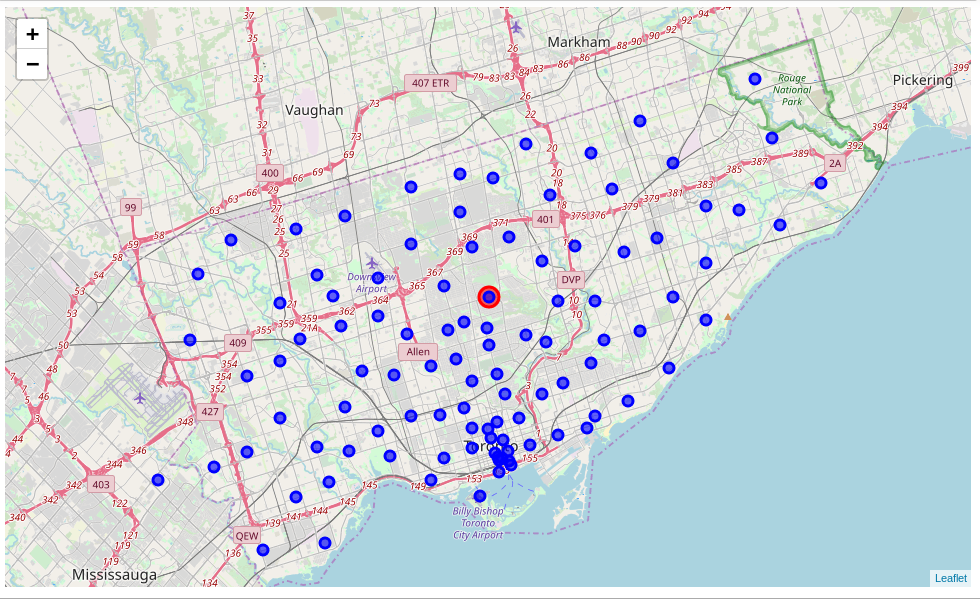

In [47]:
Image("/home/abdul_azeez/Desktop/toronto.png")

In [18]:
num_top_venues = 5

for hood in cluster_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = cluster_grouped[cluster_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['Borough','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
            Borough  freq
0  Downtown Toronto   1.0
1   Central Toronto   0.0
2      East Toronto   0.0
3         East York   0.0
4         Etobicoke   0.0


----Agincourt----
            Borough  freq
0       Scarborough   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         East York   0.0


----Agincourt North,L'Amoreaux East,Milliken,Steeles East----
            Borough  freq
0       Scarborough   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         East York   0.0


----Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown----
            Borough  freq
0         Etobicoke   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         East York   0.0


----Alderwood,Long Branch----
            Borough  freq
0         Etobicoke   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East 

            Borough  freq
0       Scarborough   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         East York   0.0


----Harbord,University of Toronto----
            Borough  freq
0  Downtown Toronto   1.0
1   Central Toronto   0.0
2      East Toronto   0.0
3         East York   0.0
4         Etobicoke   0.0


----Harbourfront East,Toronto Islands,Union Station----
            Borough  freq
0  Downtown Toronto   1.0
1   Central Toronto   0.0
2      East Toronto   0.0
3         East York   0.0
4         Etobicoke   0.0


----Harbourfront,Regent Park----
            Borough  freq
0  Downtown Toronto   1.0
1   Central Toronto   0.0
2      East Toronto   0.0
3         East York   0.0
4         Etobicoke   0.0


----High Park,The Junction South----
            Borough  freq
0      West Toronto   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         East York   0.0


----Highland Creek,Rouge Hill,Port Union----
 

            Borough  freq
0         East York   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         Etobicoke   0.0


----Upper Rouge----
            Borough  freq
0       Scarborough   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         East York   0.0


----Victoria Village----
            Borough  freq
0        North York   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         East York   0.0


----Westmount----
            Borough  freq
0         Etobicoke   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         East York   0.0


----Weston----
            Borough  freq
0              York   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3      East Toronto   0.0
4         East York   0.0


----Willowdale South----
            Borough  freq
0        North York   1.0
1   Central Toronto   0.0
2  Downtown Toronto   0.0
3  